# Import

In [1]:
from GDA import GDA
from plot import plot_cov_ellipse
from gen_data import generate_multimodal_data


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as SklearnLDA


# Function to compare GMM Discriminant Analysis with Sklearn LDA
def compare_gmm_lda(X_train, X_test, y_train, y_test, n_components=2):
    # 1. GMM Discriminant Analysis
    gmm_classifier = GDA(n_components=n_components)
    gmm_classifier.fit(X_train, y_train)
    y_pred_gmm = gmm_classifier.predict(X_test)
    accuracy_gmm = accuracy_score(y_test, y_pred_gmm)

    # 2. Sklearn LDA for comparison
    lda_sklearn = SklearnLDA(n_components=n_components)
    lda_sklearn.fit(X_train, y_train)
    y_pred_lda = lda_sklearn.predict(X_test)
    accuracy_lda = accuracy_score(y_test, y_pred_lda)

    # 3. Plot the results
    plt.figure(figsize=(10, 5))

    # GMM Discriminant Analysis Plot
    plt.subplot(1, 2, 1)
    plt.title(f"GMM Discriminant Analysis (Accuracy: {accuracy_gmm:.4f})")
    for cls in np.unique(y_train):
        plt.scatter(X_test[y_test == cls, 0], X_test[y_test == cls, 1], label=f"Class {cls}")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

    # Sklearn LDA Plot
    plt.subplot(1, 2, 2)
    plt.title(f"Sklearn LDA (Accuracy: {accuracy_lda:.4f})")
    for cls in np.unique(y_train):
        plt.scatter(X_test[y_test == cls, 0], X_test[y_test == cls, 1], label=f"Class {cls}")
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    plt.legend()

    plt.tight_layout()
    plt.show()




c:\Users\antoi\miniconda3\envs\AI\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\antoi\miniconda3\envs\AI\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\antoi\miniconda3\envs\AI\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


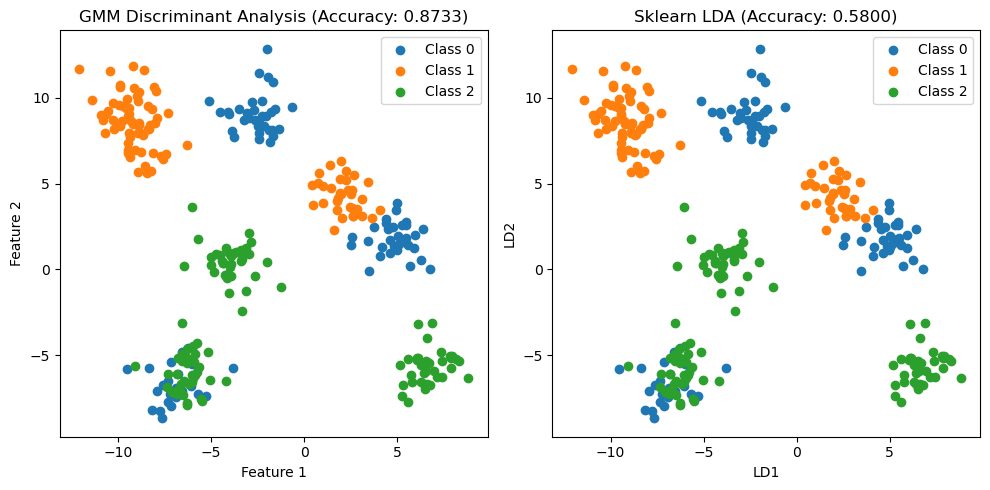

In [3]:
# Generate a multimodal dataset
X, y = generate_multimodal_data(n_samples=1000, n_features=2, n_classes=3, n_clusters_per_class=3)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compare GMM Discriminant Analysis with LDA
compare_gmm_lda(X_train, X_test, y_train, y_test, n_components=2)

c:\Users\antoi\miniconda3\envs\AI\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\antoi\miniconda3\envs\AI\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\antoi\miniconda3\envs\AI\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


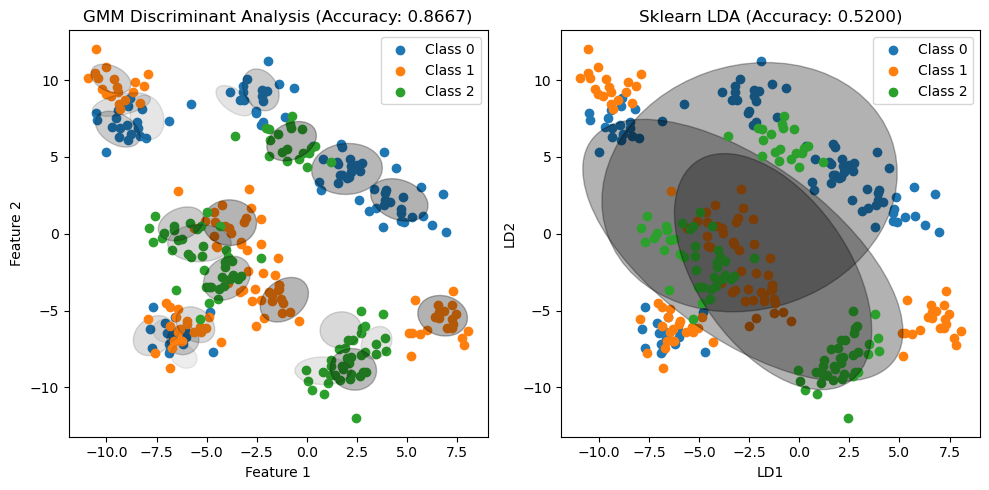

In [5]:
from sklearn.mixture import GaussianMixture

# plot means + covariance
def plot_gmm_lda(X_train, X_test, y_train, y_test, n_components=2):


    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # 1. GMM Discriminant Analysis
    gmm_classifier = GDA(n_components=n_components)
    gmm_classifier.fit(X_train, y_train)
    y_pred_gmm = gmm_classifier.predict(X_test)
    accuracy_gmm = accuracy_score(y_test, y_pred_gmm)

    # Plot GMM means and covariance ellipses
    ax = axes[0]
    ax.set_title(f"GMM Discriminant Analysis (Accuracy: {accuracy_gmm:.4f})")
    for cls in np.unique(y_train):
        ax.scatter(X_test[y_test == cls, 0], X_test[y_test == cls, 1], label=f"Class {cls}")
        gmm = gmm_classifier.gmms[cls]
        max_weights = max(gmm.weights_)
        for i in range(gmm.n_components):
            mean = gmm.means_[i]
            cov = gmm.covariances_[i]
            tau = gmm.weights_[i] / max_weights
            plot_cov_ellipse(cov, mean, ax, color='black', alpha=0.3*tau)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()

    # 2. Sklearn LDA for comparison
    lda_sklearn = SklearnLDA()
    lda_sklearn.fit(X_train, y_train)
    y_pred_lda = lda_sklearn.predict(X_test)
    accuracy_lda = accuracy_score(y_test, y_pred_lda)

    # Plot LDA means and covariance
    ax = axes[1]
    ax.set_title(f"Sklearn LDA (Accuracy: {accuracy_lda:.4f})")
    for cls in np.unique(y_train):
        ax.scatter(X_test[y_test == cls, 0], X_test[y_test == cls, 1], label=f"Class {cls}")
        mean = lda_sklearn.means_[cls]
        cov = np.cov(X_train[y_train == cls].T)
        plot_cov_ellipse(cov, mean, ax, color='black')
    ax.set_xlabel('LD1')
    ax.set_ylabel('LD2')
    ax.legend()

    plt.tight_layout()
    plt.show()



# Generate a multimodal dataset
X, y = generate_multimodal_data(n_samples=1000, n_features=2, n_classes=3, n_clusters_per_class=4)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compare GMM Discriminant Analysis with LDA
plot_gmm_lda(X_train, X_test, y_train, y_test, n_components=8)
